# (Ford GoBike System Data)
## by (Wejdan Homoud Al Ali)


## Table of Contents
<ul>
<li><a href="#intro">Preliminary Wrangling</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#Exploratory">Exploratory Data Analysis</a></li>
<li><a href="#uni_exp">1. [Univariate Exploration]</a></li>
<li><a href="#bi_exp">2. [Bivariate Exploration]</a></li>
<li><a href="#multi_exp">3. [Multivariate Exploration]</a></li>    
</ul>

<a id='intro'></a>
# Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# displaying the first rows of the data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# display the shape of the data (how many rows and columns)
print(df.shape)

# display the type of each column
print(df.dtypes)

# display statistic of the data
df.describe()

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


> The minimum of member_birth_year is 1878, which cannot be possible or it's supposed to be 1978.

In [5]:
# checking for null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> There are no null values.

In [6]:
#checking for duplicates
df.duplicated().sum()

0

> There are no duplicates

In [7]:
# running this to show randomly rows of the data and try to observe any issues
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
85290,118,2019-02-17 15:42:22.2020,2019-02-17 15:44:20.9170,274.0,Oregon St at Adeline St,37.857567,-122.267558,268.0,Ellsworth St at Russell St,37.857490,-122.261578,5211,Subscriber,1974.0,Male,No
2861,1060,2019-02-28 17:35:42.9840,2019-02-28 17:53:23.5540,364.0,China Basin St at 3rd St,37.772000,-122.389970,345.0,Hubbell St at 16th St,37.766483,-122.398279,5290,Customer,1997.0,Male,No
2936,711,2019-02-28 17:38:37.4190,2019-02-28 17:50:28.5340,130.0,22nd St Caltrain Station,37.757288,-122.392051,112.0,Harrison St at 17th St,37.763847,-122.413004,6561,Customer,1995.0,Male,No
42617,4463,2019-02-22 16:17:18.5620,2019-02-22 17:31:41.7060,343.0,Bryant St at 2nd St,37.783172,-122.393572,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6327,Subscriber,1985.0,Male,No
459,397,2019-02-28 21:20:42.3510,2019-02-28 21:27:19.6040,321.0,5th St at Folsom,37.780146,-122.403071,81.0,Berry St at 4th St,37.775880,-122.393170,6489,Subscriber,1989.0,Female,No
147677,486,2019-02-07 07:27:48.0480,2019-02-07 07:35:54.8570,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,5482,Subscriber,1981.0,Male,No
76260,201,2019-02-19 08:32:47.9880,2019-02-19 08:36:09.3120,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,90.0,Townsend St at 7th St,37.771058,-122.402717,5239,Subscriber,1978.0,Male,No
27173,140,2019-02-25 10:08:22.7200,2019-02-25 10:10:43.6540,132.0,24th St at Chattanooga St,37.751819,-122.426614,386.0,24th St at Bartlett St,37.752105,-122.419724,1087,Subscriber,1976.0,Male,No
169473,1086,2019-02-04 09:55:28.0090,2019-02-04 10:13:34.8620,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,5331,Subscriber,2000.0,Male,No
122792,356,2019-02-11 10:35:00.5000,2019-02-11 10:40:56.7120,58.0,Market St at 10th St,37.776619,-122.417385,349.0,Howard St at Mary St,37.781010,-122.405666,5318,Subscriber,1974.0,Male,No


<a id='cleaning'></a>
# Cleaning


### Issues:


 1- There are alot of null values in (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender) columns.
 
 2- Change the type of some columns to appropriate types (start_station_id, bike_id, end_station_id) strings, (start_time, end_time) timestamp, (user_type, member_gender) category.
 
 3- The minimum of member_birth_year is 1878, which cannot be true or it's supposed to be 1978.
 
 4- Delete the columns that we're not going to use for the analysis.

In [8]:
# making a copy of the data before doing the cleaning step

df_clean = df.copy()

### Issue 1:

#### Define:

Delete the null values in these columns (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender).

#### Code:

In [9]:
df_clean.dropna(how='any', axis=0, inplace=True)

#### Test:

In [10]:
print(df_clean.isnull().sum())
print(df_clean.shape)

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64
(174952, 16)


### Issue 2:

#### Define:

Convert the type of (start_station_id, bike_id, end_station_id) to strings.

#### Code:

In [11]:
df_clean['start_station_id'] = df_clean['start_station_id'].apply(str)
df_clean['bike_id'] = df_clean['bike_id'].apply(str)
df_clean['end_station_id'] = df_clean['end_station_id'].apply(str)

#### Test:

In [12]:
print(df_clean.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


### Issue 3:

#### Define:

Convert the type of (start_time, end_time) to timestamp.

#### Code:

In [13]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

#### Test:

In [14]:
print(df_clean.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object


### Issue 4:

#### Define:

Convert the type of (user_type, member_gender) to category.

#### Code:

In [15]:
df_clean['user_type'] = pd.Categorical(df_clean.user_type)
df_clean['member_gender'] = pd.Categorical(df_clean.member_gender)

#### Test:

In [16]:
print(df_clean.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
dtype: object


### Issue 5:

#### Define:

Delete the row where the birth year is 1878.

#### Code:

In [17]:
df_min = df_clean.drop(df_clean[(df_clean['member_birth_year'] <= 1900)].index, inplace=True)

#### Test:

In [18]:
df_clean.member_birth_year.describe()

count    174898.000000
mean       1984.829443
std          10.008752
min        1901.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

### Issue 6:

#### Define:

Delete the unwanted columns, which I don't think I will use them for the analysis.

#### Code:

In [19]:
df_clean.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
              axis=1, inplace=True)

#### Test:

In [20]:
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

<a id='Exploratory'></a>
# Exploratory Data Analysis

### What is the structure of your dataset?

> This data set includes information about individual rides made in Feb 2019.
After the cleaning part, now the data set has 174,898 rows and 12 columns. There are 329 stations, 4607 bikes,
two user types(customer & subscriber).

### What is/are the main feature(s) of interest in your dataset?

> I have cleaned the data enough on what I think is interesting for the analysis. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think it's going to be: member_gender, member_birth_year and user_type.

<a id='uni_exp'></a>
## Univariate Exploration

> In this section, I will use bar charts, pie charts or histograms for Univariate visualization.

### Let's see what is the most gender of riders? 

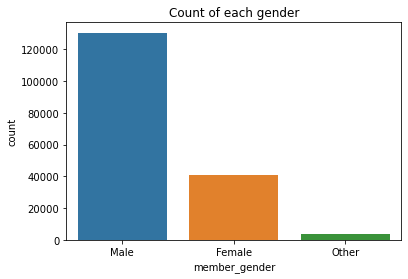

In [21]:
sb.countplot(data=df_clean, x='member_gender', order=['Male', 'Female', 'Other']);

freq = df_clean['member_gender'].value_counts()

gen_order = freq.index

sb.countplot(data=df_clean, x='member_gender', order=gen_order)
plt.title('Count of each gender');

> Most of riders are males with over 120000 count.

### Is there a period of birth years with higher counts or riders?

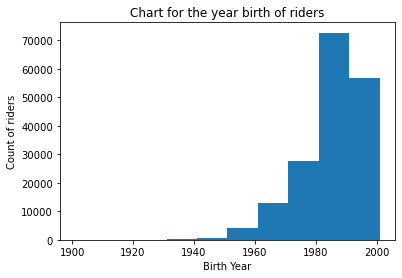

In [22]:
bin_edges = np.arange(df_clean['member_birth_year'].min(), df_clean['member_birth_year'].max()+10, 10)
plt.hist(data = df_clean, x ='member_birth_year', bins = bin_edges)
plt.xlabel('Birth Year')
plt.ylabel('Count of riders')
plt.title('Chart for the year birth of riders');

> From the chart above we can see that riders are with Birth year between 1940 to 2000.

#### I'll do another chart with limiting the years after 1940.

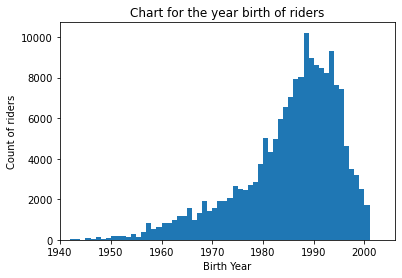

In [23]:
bin_edges = np.arange(df_clean['member_birth_year'].min(), df_clean['member_birth_year'].max()+1, 1)
plt.hist(data = df_clean, x ='member_birth_year', bins = bin_edges)
plt.xlabel('Birth Year')
plt.ylabel('Count of riders')
plt.title('Chart for the year birth of riders')
plt.xlim(1940);

> We can see that most of riders birth year are around the 90's.

### What type of users is higher?

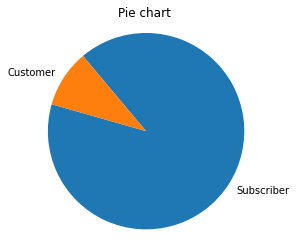

In [24]:
users_counts = df_clean['user_type'].value_counts()

plt.pie(users_counts, labels = users_counts.index, startangle = 130, counterclock = False);
plt.title('Pie chart ')
plt.axis('square');

> More than 90% of the users are Subscribers.

### What are the top start/end stations?

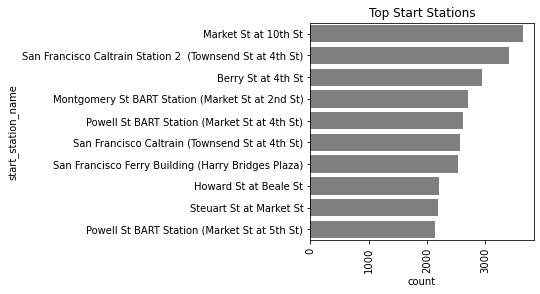

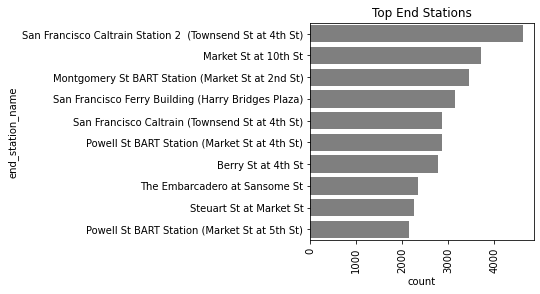

In [25]:
# a function to create bar charts for two columns of our data with only top 10 values

def stations(column, title):
    plt.figure(figsize=(4,4))
    order = df_clean[column].value_counts().head(10).index
    base_color = sb.color_palette()[7]
    sb.countplot(data = df_clean, y = column, color = base_color, order = order);
    plt.xticks(rotation = 90);
    plt.title(title);
    

#plot bar chart to visualize the top 10 start & end stations 
stations('start_station_name', 'Top Start Stations')
stations('end_station_name', 'Top End Stations')

> These two charts shows the top 10 start/end stations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the (member_birth_year) column and the last two bar charts I had to use the lim(1940).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the cleaning part, I had to drop years below 1900, because it is not possible to have these birth years since the data set is for Feb 2019.

<a id='bi_exp'></a>
## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the
data. I will use two quantitative variables, two categorical variables or one quantitative variable with categorical variable.

### Is there a relationship between the gender of riders and their birth year or the user type?

#### Here I'm trying to show the relationship between one quantitative variable with categorical variable:

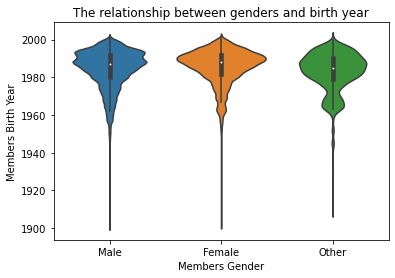

In [26]:
genders = ['Male', 'Female', 'Other']


gender = pd.api.types.CategoricalDtype(ordered=True, categories=genders)

 
df_clean['member_gender'] = df_clean['member_gender'].astype(gender)

sb.violinplot(data=df_clean, x='member_gender', y='member_birth_year')


# a function for naming labels and title for each visualization
def x_y_t(col1, col2, title):
    ''' This function is to name labels and titles for each visualization'''
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title);
    

x_y_t('Members Gender', 'Members Birth Year', 'The relationship between genders and birth year');

> All genders members are mostly with birth year between 1980 & 2000.

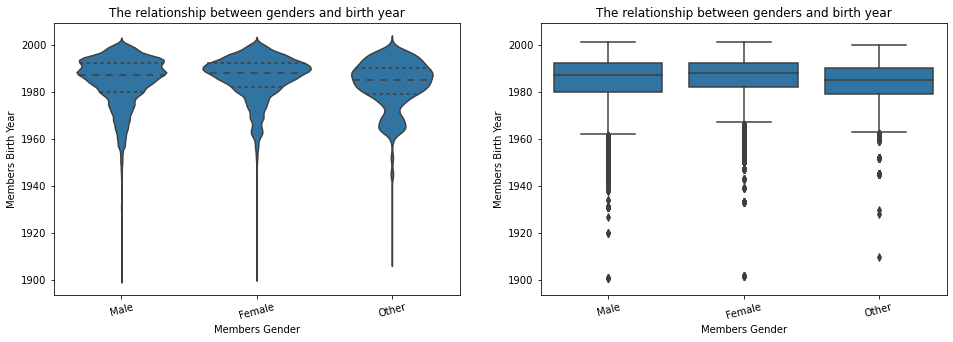

In [27]:
genders = ['Male', 'Female', 'Other']

gender = pd.api.types.CategoricalDtype(ordered=True, categories=genders)

df_clean['member_gender'] = df_clean['member_gender'].astype(gender);


plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]


plt.subplot(1, 2, 1)

ax1 = sb.violinplot(data=df_clean, x='member_gender', y='member_birth_year', color=base_color, inner='quartile')
plt.xticks(rotation=15)
x_y_t('Members Gender', 'Members Birth Year', 'The relationship between genders and birth year');


plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='member_gender', y='member_birth_year', color=base_color)
plt.xticks(rotation=15)
x_y_t('Members Gender', 'Members Birth Year', 'The relationship between genders and birth year');
plt.ylim(ax1.get_ylim());

> I tried to use different plot (box plot) to observe new insights, the number of males is higher than the other two genders between 1980 & 2000.

#### Here I will show the relationship between two categorical variables:

In [28]:
df_clean['user_type'].value_counts()

Subscriber    158337
Customer       16561
Name: user_type, dtype: int64

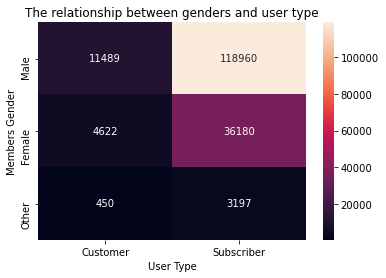

In [29]:
counts = df_clean.groupby(['member_gender', 'user_type']).size()

counts = counts.reset_index(name='count')

counts = counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')

sb.heatmap(counts, annot = True, fmt = 'd')

x_y_t('User Type', 'Members Gender', 'The relationship between genders and user type')

> Most of users are Subscribers and they are males.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is nothing noticable in the relationship between genders and birth year, except that all the three genders are between 1980 & 2000.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed that most of the users are subscribers with 158337 counts, and not customers (16561).

<a id='multi_exp'></a>
## Multivariate Exploration

> I will create plots of three or more variables to investigate the data even
further.

#### Here I'm trying to show the relationship between three variables:

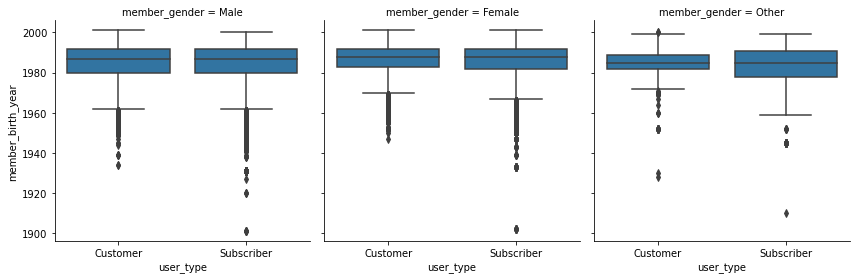

In [30]:
g = sb.FacetGrid(data = df_clean, col = 'member_gender', size = 4)
g.map(sb.boxplot, 'user_type', 'member_birth_year');

> Count of customer user type is always less than subsriber for each gender.

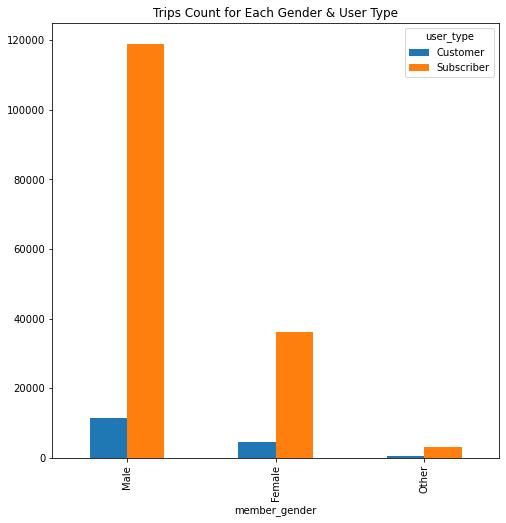

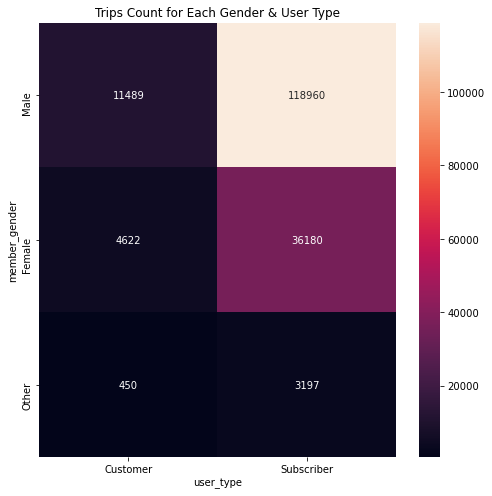

In [31]:
trip_counts = df_clean.groupby(['member_gender', 'user_type']).size()
trip_counts = trip_counts.reset_index(name='count')
trip_counts = trip_counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')

trip_counts.plot(kind='bar', figsize = (8,8))
plt.title('Trips Count for Each Gender & User Type');


plt.figure(figsize=(8, 8))
sb.heatmap(trip_counts, annot = True, fmt = 'd')
plt.title('Trips Count for Each Gender & User Type');

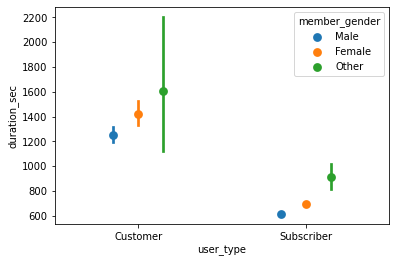

In [32]:
ax = sb.pointplot(data = df_clean, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")

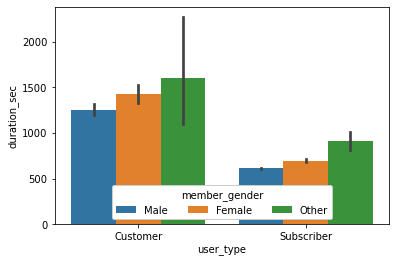

In [33]:
axx = sb.barplot(data = df_clean, x = 'user_type', y = 'duration_sec', hue = 'member_gender')
axx.legend(loc = 8, ncol = 3, framealpha = 1, title = 'member_gender');

> The third gender shows here longer trip duration per seconds in both user types.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As observed in the previous section, there was nothing noticable in the relationship between Birth Year and Genders, but after adding a third variable (User Type) we can see that the average between the two types for males and females is close to each other, while in (gender = other) subscribers are higher than customers.

### Were there any interesting or surprising interactions between features?

> The most interesting thing is that most of users are subscribers and most of them are males born between 80's & 90's.

In [34]:
df_clean.to_csv('ford-gobike-system.csv')

In [35]:
df_ford = pd.read_csv('ford-gobike-system.csv')